In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
import os

In [4]:
collisions_file_str = "collisions_{}_{}.csv"
progress_file_str = "progress_{}_{}.csv"
algorithms = ["e2e","e2e_all","sac","ddpg"]
tracks = ["track_porto","track_barca","racecar_walker"]

In [18]:
collisions_dfs = [] 
progress_dfs = []
for i in algorithms:
    for j in tracks:
        collision_path = collisions_file_str.format(i,j)
        progress_path = progress_file_str.format(i,j)
        #print("Algorithm:",i,"| Track:",j)
        print('--------------------------------------------------------')
        df = pd.read_csv(progress_path).iloc[:30].rename(columns=lambda col: col.strip())
        df = df[df.columns[:2]].agg(['mean', 'median','std'])
        df['algorithm'] = i
        df['track'] = j
        print(df)
        if(os.path.exists(collision_path)):
            c_df = pd.read_csv(collision_path).rename(columns=lambda col: col.strip())
            col_count = c_df[c_df["experiment_number"]<=30].shape[0]
            row = [[i,j,col_count]]
            print("Number of Collisions",col_count)
        else:
            row = [[i,j,0]]
            print("Number of Collisions",0)
        row_df = pd.DataFrame(row,columns=['algorithm','track','collision_count'])
        collisions_dfs.append(row_df)
        progress_dfs.append(df)
        print('--------------------------------------------------------')

--------------------------------------------------------
        laps_completed  time_elapsed algorithm        track
mean          2.112351     62.343133       e2e  track_porto
median        2.180334     62.324000       e2e  track_porto
std           0.250643      0.093819       e2e  track_porto
Number of Collisions 0
--------------------------------------------------------
--------------------------------------------------------
        laps_completed  time_elapsed algorithm        track
mean          0.490807     55.037033       e2e  track_barca
median        0.556542     62.305000       e2e  track_barca
std           0.150416     16.548745       e2e  track_barca
Number of Collisions 5
--------------------------------------------------------
--------------------------------------------------------
        laps_completed  time_elapsed algorithm           track
mean          0.457328     17.730167       e2e  racecar_walker
median        0.462877     17.999500       e2e  racecar_walker


In [24]:
collisions = pd.concat(collisions_dfs).reset_index().drop(columns="index")
collisions

,algorithm,track,collision_count
0,e2e,track_porto,0
1,e2e,track_barca,5
2,e2e,racecar_walker,30
3,e2e_all,track_porto,0
4,e2e_all,track_barca,0
5,e2e_all,racecar_walker,0
6,sac,track_porto,0
7,sac,track_barca,30
8,sac,racecar_walker,30
9,ddpg,track_porto,0


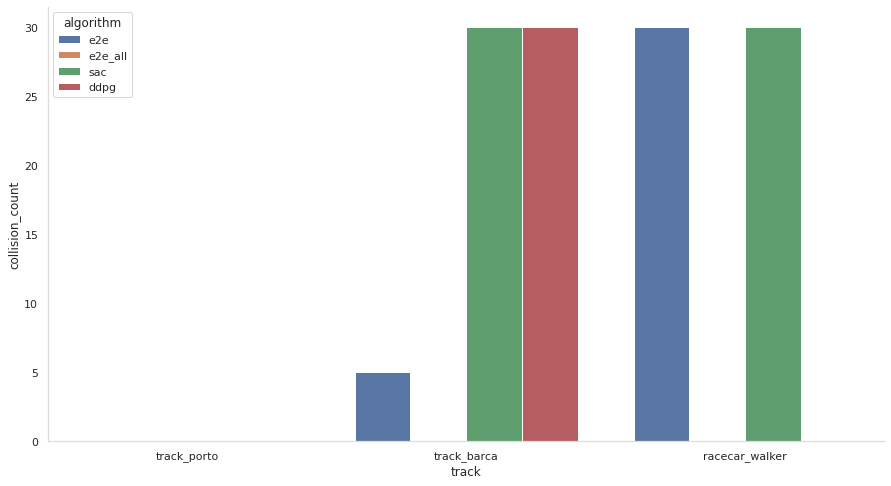

In [28]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=collisions, x="track",y="collision_count",hue="algorithm")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)

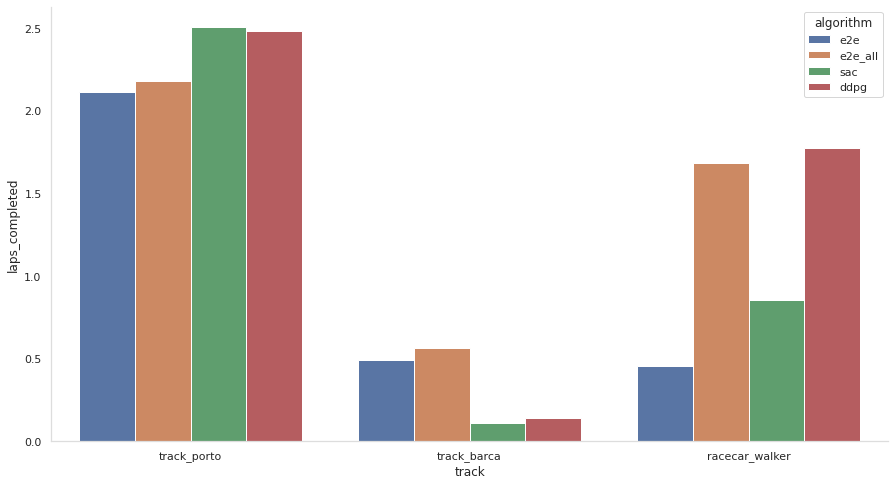

In [36]:
progress = pd.concat(progress_dfs)

plt.figure(figsize=(15,8))
ax = sns.barplot(data=progress[progress.index=='mean'], x="track",y="laps_completed",hue="algorithm")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)